In [165]:
import random
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import time

In [166]:
def get_list_from_csv(link):
  csv = pd.read_csv(link, header=None)
  lst = csv.values.tolist()[1:]
  return [tuple([int(x[0]), int(x[1])]) for x in lst]

In [167]:
#Casos de prueba (CSV, OPTIMO)
elems_3 = (get_list_from_csv("https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/casos_prueba/3%20elem.csv"), 10)
elems_10 = (get_list_from_csv("https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/casos_prueba/10%20elem.csv"), 29)
elems_100 = (get_list_from_csv("https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/casos_prueba/100%20elem.csv"), 5223)
elems_10k = (get_list_from_csv("https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/casos_prueba/10000%20elem.csv"), 497886735)

In [168]:
def analizar_rivales(videos, ordenamiento):
  ordenamiento(videos)
  s_total = 0
  t_total = 0
  for video in videos:
    s_total += video[0]
    t_total = max(t_total, s_total + video[1])
  return t_total

In [169]:
# Este ordenamiento consiste en ordenar los videos de mayor a menor por tiempo de asistentes.
def orden_asistentes_desc(videos):
   videos.sort(key = lambda x: (x[1]), reverse = True)

# Este ordenamiento consiste en ordenar los videos de menor a mayor la relacion tiempo_scaloni/tiempo_asistente.
# Consecuentemente, aquellos que sean mucho mayores en tiempo de asistentes en comparacion a tiempo de scaloni se veran primero.
def orden_relacion_si_ai(videos):
   videos.sort(key = lambda x: (x[0]/x[1]))

# Este ordenamiento consiste en ordenar los videos de mayor a menor por la suma de tiempos.
def orden_suma(videos):
   videos.sort(key = lambda x: x[0] + x[1], reverse=True)

# Este ordenamiento consiste en ordenar los videos de menor a mayor por lo que le tome a scaloni.
def orden_scaloni(videos):
   videos.sort(key = lambda x: x[0])

sorts = [orden_scaloni, orden_relacion_si_ai,orden_asistentes_desc, orden_suma]

# Pruebas de Optimalidad

In [170]:
test_cases = [elems_3, elems_10, elems_100, elems_10k]

In [171]:
# Aplicamos ordenamientos a casos de prueba de la materia.
for test in test_cases:
  for sort in sorts:
    print(f'Testing algorithm with: {sort.__name__} and data: {len(test[0])} elems\n')
    data = test[0]
    returned_value = analizar_rivales(data, sort)
    status_message = "\x1b[32mPASSED\x1b[0m" if test[1] == returned_value else "\x1b[31mFAILED\x1b[0m"
    print(f'EXPECTED: {test[1]} --- RESULT: {returned_value}  ---  DIFF: +{returned_value - test[1]} --- STATUS: {status_message}\n')

  print("-------------------------------------------------------------")

Testing algorithm with: orden_scaloni and data: 3 elems

EXPECTED: 10 --- RESULT: 10  ---  DIFF: +0 --- STATUS: PASSED

Testing algorithm with: orden_relacion_si_ai and data: 3 elems

EXPECTED: 10 --- RESULT: 10  ---  DIFF: +0 --- STATUS: PASSED

Testing algorithm with: orden_asistentes_desc and data: 3 elems

EXPECTED: 10 --- RESULT: 10  ---  DIFF: +0 --- STATUS: PASSED

Testing algorithm with: orden_suma and data: 3 elems

EXPECTED: 10 --- RESULT: 10  ---  DIFF: +0 --- STATUS: PASSED

-------------------------------------------------------------
Testing algorithm with: orden_scaloni and data: 10 elems

EXPECTED: 29 --- RESULT: 33  ---  DIFF: +4 --- STATUS: FAILED

Testing algorithm with: orden_relacion_si_ai and data: 10 elems

EXPECTED: 29 --- RESULT: 29  ---  DIFF: +0 --- STATUS: PASSED

Testing algorithm with: orden_asistentes_desc and data: 10 elems

EXPECTED: 29 --- RESULT: 29  ---  DIFF: +0 --- STATUS: PASSED

Testing algorithm with: orden_suma and data: 10 elems

EXPECTED: 29 

# Pruebas de Volumen

In [172]:
# N siendo la cantidad de videos a generar
def generar_dataset(n):
  random.seed()
  return [(random.randint(1, 100), random.randint(1, 100)) for _ in range(n)]

In [173]:
def prueba_volumen():
    tiempos = {sort.__name__: [] for sort in sorts}
    n_elementos = list(range(0, 50001, 100))

    for n in n_elementos:
      for sort in sorts:
        videos = generar_dataset(n)
        inicio = time.perf_counter()
        analizar_rivales(videos, sort)
        fin = time.perf_counter()
        tiempo_ejecucion = (fin - inicio) * 1000
        tiempos[sort.__name__].append(tiempo_ejecucion)

    return n_elementos, tiempos

In [174]:
# Realiza la prueba de volumen
n_elementos, mediciones = prueba_volumen()

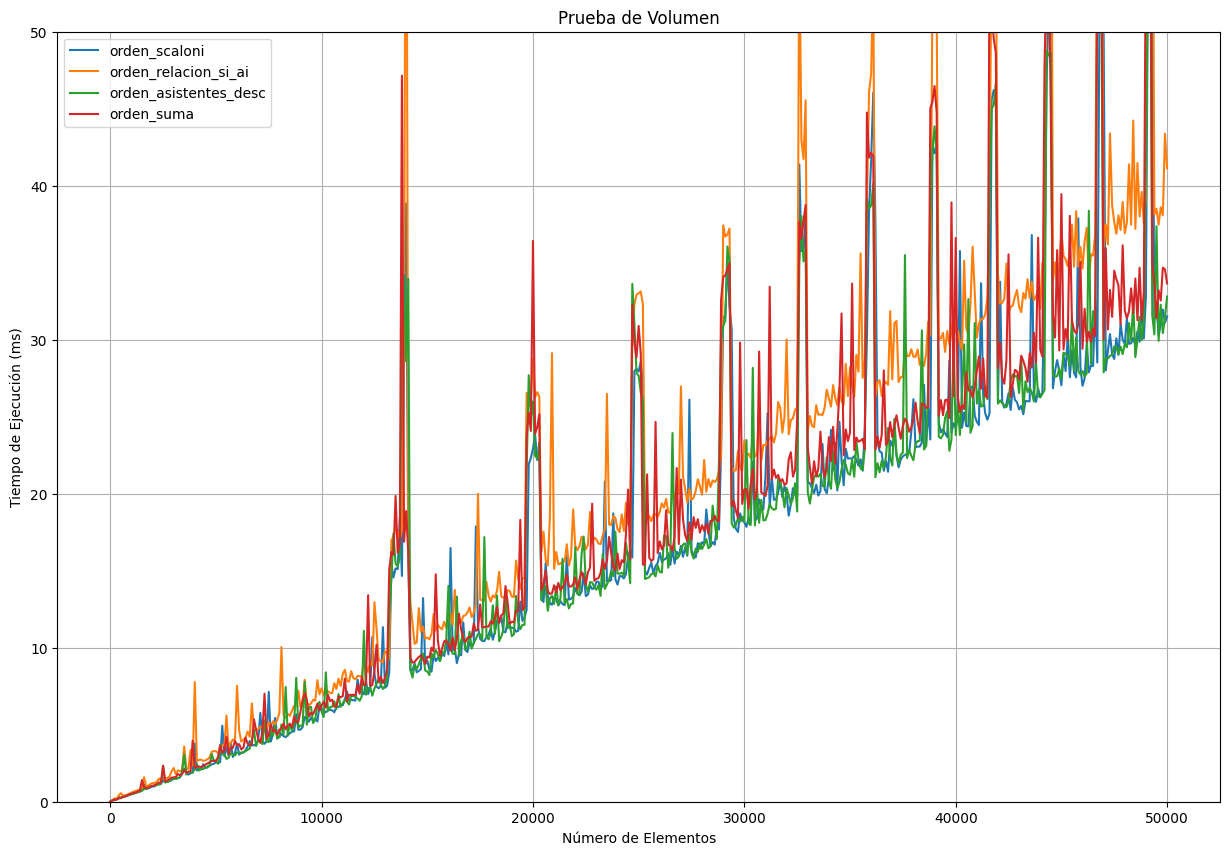

In [175]:
plt.figure(figsize=(15,10))
for sort, tiempo in mediciones.items():
    plt.plot(n_elementos, tiempo, label=sort)
# Grafica los resultados
plt.ylim(0,50)
plt.xlabel('Número de Elementos')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.title('Prueba de Volumen')
plt.legend()
plt.grid(True)
plt.show()

#Pruebas de Variabilidad

In [176]:
def generar_dataset_variabilidad(n, casos):
  for _ in range(1000):
    random.seed()
    casos['asist_tarda_mas'].append((random.randint(1, 100), random.randint(n, n + 100)))
    casos['scalo_tarda_mas'].append((random.randint(n, n + 100), random.randint(1, 100)))
    casos['tardan_igual'].append((random.randint(n, n + 100), random.randint(n, n + 100)))

In [177]:
casos = {'asist_tarda_mas': [], 'scalo_tarda_mas': [], 'tardan_igual': []}
resultados = []
generar_dataset_variabilidad(1000, casos)
for caso, data in casos.items():
  for sort in sorts:
    resultados.append((caso, analizar_rivales(data, sort), sort.__name__))
  resultados.sort(key = lambda x: x[1])
  data = []
  for res in resultados:
    print(f'Testing case: {res[0]} with: {res[2]}\n')
    diff_value = "\x1b[32m0\x1b[0m" if res[1] == resultados[0][1] else ("\x1b[31m+" + str(res[1] - resultados[0][1]) + "\x1b[0m")
    print(f'RESULT: {res[1]} ---  DIFF: {diff_value}\n')
  resultados = []
  print("-------------------------------------------------------------")

Testing case: asist_tarda_mas with: orden_relacion_si_ai

RESULT: 52173 ---  DIFF: 0

Testing case: asist_tarda_mas with: orden_asistentes_desc

RESULT: 52173 ---  DIFF: 0

Testing case: asist_tarda_mas with: orden_suma

RESULT: 52173 ---  DIFF: 0

Testing case: asist_tarda_mas with: orden_scaloni

RESULT: 52240 ---  DIFF: +67

-------------------------------------------------------------
Testing case: scalo_tarda_mas with: orden_relacion_si_ai

RESULT: 1049653 ---  DIFF: 0

Testing case: scalo_tarda_mas with: orden_asistentes_desc

RESULT: 1049653 ---  DIFF: 0

Testing case: scalo_tarda_mas with: orden_suma

RESULT: 1049655 ---  DIFF: +2

Testing case: scalo_tarda_mas with: orden_scaloni

RESULT: 1049734 ---  DIFF: +81

-------------------------------------------------------------
Testing case: tardan_igual with: orden_asistentes_desc

RESULT: 1052004 ---  DIFF: 0

Testing case: tardan_igual with: orden_suma

RESULT: 1052005 ---  DIFF: +1

Testing case: tardan_igual with: orden_relaci

In [178]:
resultados = {sort.__name__: [] for sort in sorts}
rango = list(range(1, 10001, 100))
for n in rango:
  random.seed()
  videos = [(random.randint(1, 100), random.randint(n, n+100)) for _ in range(1000)]
  res_sort = []
  for sort in sorts:
    res_sort.append((sort.__name__, analizar_rivales(videos, sort)))

  res_sort.sort(key = lambda x: x[1])
  for res in res_sort:
    resultados[res[0]].append(res[1] - res_sort[0][1])

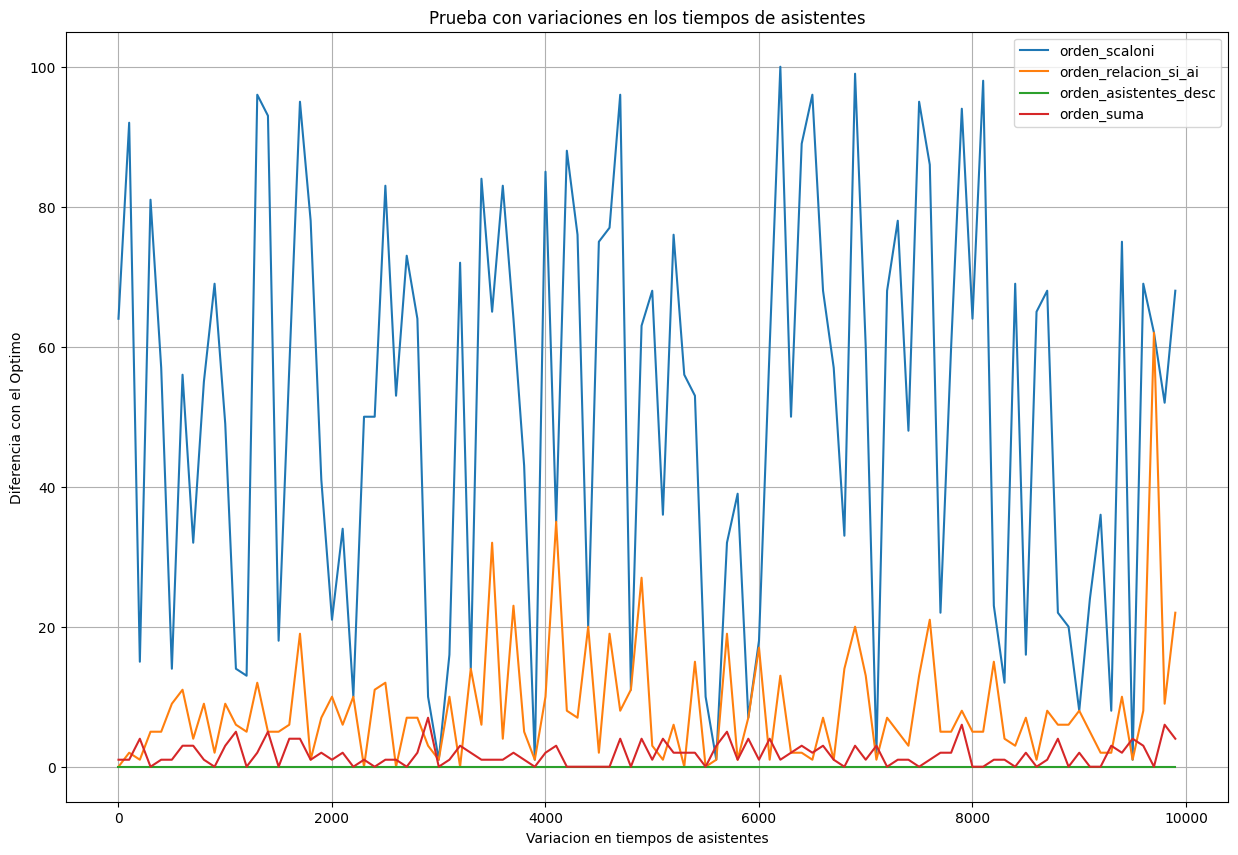

In [179]:
plt.figure(figsize=(15,10))
for sort, res in resultados.items():
    plt.plot(rango, res, label=sort)
  # Grafica los resultados

plt.xlabel(f'Variacion en tiempos de asistentes')
plt.ylabel('Diferencia con el Optimo')
plt.title(f'Prueba con variaciones en los tiempos de asistentes')
plt.legend()
plt.grid(True)
plt.show()

In [180]:
resultados = {sort.__name__: [] for sort in sorts}
rango = list(range(1, 10001, 100))
for n in rango:
  random.seed()
  videos = [(random.randint(n, n+100), random.randint(1, 100)) for _ in range(1000)]
  res_sort = []
  for sort in sorts:
    res_sort.append((sort.__name__, analizar_rivales(videos, sort)))

  res_sort.sort(key = lambda x: x[1])
  for res in res_sort:
    resultados[res[0]].append(res[1] - res_sort[0][1])

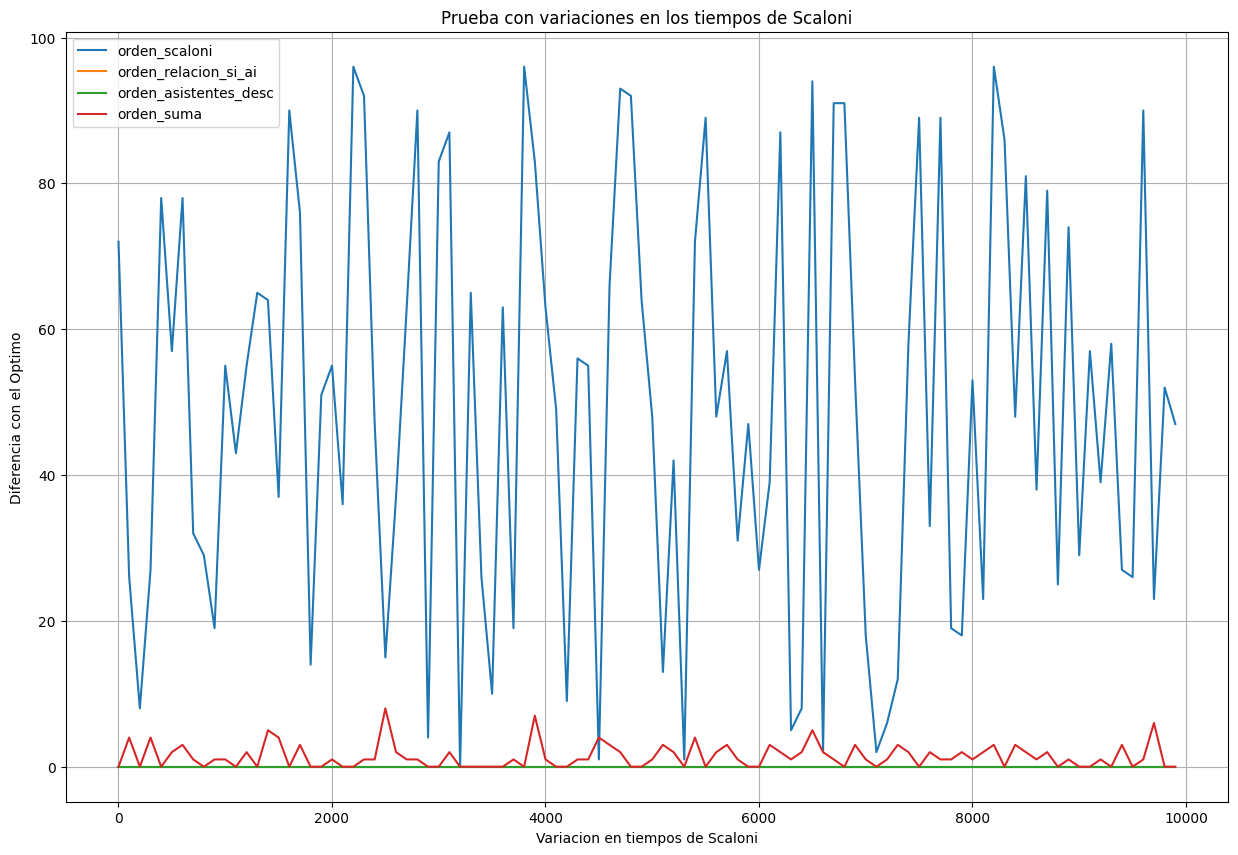

In [181]:
plt.figure(figsize=(15,10))
for sort, res in resultados.items():
    plt.plot(rango, res, label=sort)
  # Grafica los resultados

plt.xlabel(f'Variacion en tiempos de Scaloni')
plt.ylabel('Diferencia con el Optimo')
plt.title(f'Prueba con variaciones en los tiempos de Scaloni')
plt.legend()
plt.grid(True)
plt.show()